# Australian Open 2020: Winner Predictor
## Web Intelligence Course, Ca' Foscari University, A.Y. 2019/2020
#### Diego Chinellato, 867637 - Giorgia Campardo, 867928

In [1]:
%matplotlib inline

# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# our modules
from preprocessing import *
from models import *
from reports import *

In [2]:
full_dataset = pd.read_csv('data/dataset.csv', 
                            encoding='utf-8-sig', 
                            dtype=DATA_TYPES,
                            parse_dates=['Date', 'WBD', 'LBD'])

In [3]:
full_dataset.head()

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,WElo,WSurfElo,WBD,WHand,WBHand,LElo,LSurfElo,LBD,LHand,LBHand
0,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Lopez F.,...,1783.4,1724.7,NaT,NaN,NaN,NaN,NaN,1984-03-24,R,1.0
1,1,Brisbane,Brisbane International,2011-01-02,ATP250,Outdoor,Hard,1st Round,3,Istomin D.,...,1610.9,1611.0,1986-09-07,R,2.0,NaN,NaN,1974-05-05,L,2.0
2,2,Chennai,Chennai Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Kendrick R.,...,NaN,NaN,1979-11-15,R,2.0,NaN,NaN,1981-08-16,L,2.0
3,3,Doha,Qatar Exxon Mobil Open,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Bubka S.,...,NaN,NaN,1987-02-10,R,2.0,NaN,NaN,1985-08-07,R,2.0
4,1,Brisbane,Brisbane International,2011-01-03,ATP250,Outdoor,Hard,1st Round,3,Roddick A.,...,NaN,NaN,1982-08-30,R,2.0,NaN,NaN,1985-08-08,R,2.0


In [4]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 52 columns):
ATP           23634 non-null int32
Location      23634 non-null object
Tournament    23634 non-null object
Date          23634 non-null datetime64[ns]
Series        23634 non-null object
Court         23634 non-null object
Surface       23634 non-null object
Round         23634 non-null object
Best of       23634 non-null int32
Winner        23634 non-null object
Loser         23634 non-null object
WRank         23624 non-null float64
LRank         23586 non-null float64
WPts          23626 non-null float64
LPts          23587 non-null float64
W1            23483 non-null float64
L1            23485 non-null float64
W2            23260 non-null float64
L2            23260 non-null float64
W3            11173 non-null float64
L3            11173 non-null float64
W4            2200 non-null float64
L4            2200 non-null float64
W5            816 non-null float64
L5          

In [5]:
full_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ATP,23634.0,33.036896,18.040228,1.000,19.00,33.00,49.00,67.00
Best of,23634.0,3.386139,0.789431,3.000,3.00,3.00,3.00,5.00
WRank,23624.0,56.754614,70.940513,1.000,16.00,40.00,74.00,1890.00
LRank,23586.0,87.187908,109.198180,1.000,34.00,62.00,100.00,2159.00
WPts,23626.0,1988.829002,2477.960179,1.000,693.00,1060.00,2030.00,16950.00
LPts,23587.0,1127.641497,1294.122302,1.000,557.00,788.00,1195.00,16950.00
W1,23483.0,5.806583,1.225518,0.000,6.00,6.00,6.00,7.00
L1,23485.0,4.105770,1.834737,0.000,3.00,4.00,6.00,7.00
W2,23260.0,5.784007,1.246084,0.000,6.00,6.00,6.00,7.00
L2,23260.0,3.952193,1.857456,0.000,3.00,4.00,6.00,7.00


In [6]:
def compute_elo_rankings(data):
    """
    Given the list on matches in chronological order, for each match, computes 
    the elo ranking of the 2 players at the beginning of the match
    """
    print("Elo rankings computing...")
    players=list(pd.Series(list(data.Winner)+list(data.Loser)).value_counts().index)
    elo=pd.Series(np.ones(len(players))*1500,index=players)
    ranking_elo=[(1500,1500)]
    for i in range(1,len(data)):
        w=data.iloc[i-1,:].Winner
        l=data.iloc[i-1,:].Loser
        elow=elo[w]
        elol=elo[l]
        pwin=1 / (1 + 10 ** ((elol - elow) / 400))    
        K_win=32
        K_los=32
        new_elow=elow+K_win*(1-pwin)
        new_elol=elol-K_los*(1-pwin)
        elo[w]=new_elow
        elo[l]=new_elol
        ranking_elo.append((elo[data.iloc[i,:].Winner],elo[data.iloc[i,:].Loser])) 
    ranking_elo=pd.DataFrame(ranking_elo,columns=["elo_winner","elo_loser"])    
    ranking_elo["proba_elo"]=1 / (1 + 10 ** ((ranking_elo["elo_loser"] - ranking_elo["elo_winner"]) / 400))   
    return ranking_elo

In [7]:
from preprocessing import *
X, Y = preprocess_data(min_date=2014,
                       features_to_drop=['Best of', 'Court', 'WHand', 'WBHand', 'LHand', 'LBHand'])

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17308 entries, 0 to 17308
Data columns (total 18 columns):
Series            17308 non-null int64
Round             17308 non-null int64
P1Rank            17308 non-null int32
P2Rank            17308 non-null int32
WPts              17308 non-null float64
LPts              17308 non-null float64
MaxP1             17308 non-null float64
MaxP2             17308 non-null float64
AvgP1             17308 non-null float64
AvgP2             17308 non-null float64
WElo              17308 non-null float64
WSurfElo          17308 non-null float64
LElo              17308 non-null float64
LSurfElo          17308 non-null float64
Surface__Clay     17308 non-null uint8
Surface__Grass    17308 non-null uint8
Surface__Hard     17308 non-null uint8
GreaterRank       17308 non-null int32
dtypes: float64(10), int32(3), int64(2), uint8(3)
memory usage: 2.0 MB


In [9]:
X.head()

,Series,Round,P1Rank,P2Rank,WPts,LPts,MaxP1,MaxP2,AvgP1,AvgP2,WElo,WSurfElo,LElo,LSurfElo,Surface__Clay,Surface__Grass,Surface__Hard,GreaterRank
0,0,1,31,9,1230.0,3300.0,1.66,2.54,1.60,2.29,1890.5,1862.7,1793.3,1730.5,0,0,1,0
11,0,1,17,68,1915.0,706.0,1.44,3.50,1.37,3.02,1936.5,1877.8,1641.9,1598.2,0,0,1,1
10,0,1,37,23,1130.0,1520.0,2.56,1.67,2.29,1.60,1892.6,1840.0,1837.8,1805.7,0,0,1,0
4,0,1,111,78,506.0,647.0,2.52,1.68,2.26,1.62,1619.2,1533.0,1693.1,1668.6,0,0,1,0
3,0,1,1,74,13030.0,663.0,1.06,17.50,1.03,12.05,2203.4,2125.2,1532.0,1508.0,0,0,1,1


In [10]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Series,17308.0,1.472383,1.508241,0.00,0.00,1.00,2.00,4.00
Round,17308.0,1.607927,2.114007,0.00,0.00,1.00,2.00,7.00
P1Rank,17308.0,64.184308,75.534284,1.00,21.00,47.00,83.00,1821.00
P2Rank,17308.0,64.184308,75.534284,1.00,21.00,47.00,83.00,1821.00
WPts,17308.0,1720.769009,2199.205517,1.00,655.00,971.00,1703.00,16950.00
LPts,17308.0,1720.769009,2199.205517,1.00,655.00,971.00,1703.00,16950.00
MaxP1,17308.0,8.004802,455.341374,1.01,1.47,2.00,3.13,42586.00
MaxP2,17308.0,8.004802,455.341374,1.01,1.47,2.00,3.13,42586.00
AvgP1,17308.0,2.670179,2.465247,1.01,1.41,1.89,2.87,32.55
AvgP2,17308.0,2.670179,2.465247,1.01,1.41,1.89,2.87,32.55


Models construction

In [11]:
print('Accuracy for the baseline model is:', baseline_model(X, Y))

Accuracy for the baseline model is: 0.35


Let's split the data into train set, validation set and test set

In [12]:
X_train_l, X_test, Y_train_l, Y_test = train_test_split(X, Y, test_size=0.20)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_l, Y_train_l, test_size=0.25)

Max accuracy (validation, training): (0.693, 0.73)
Criterion: gini
Splitter: random
Max depth: 53
Max leaves: 190
Execution took 0.60 min


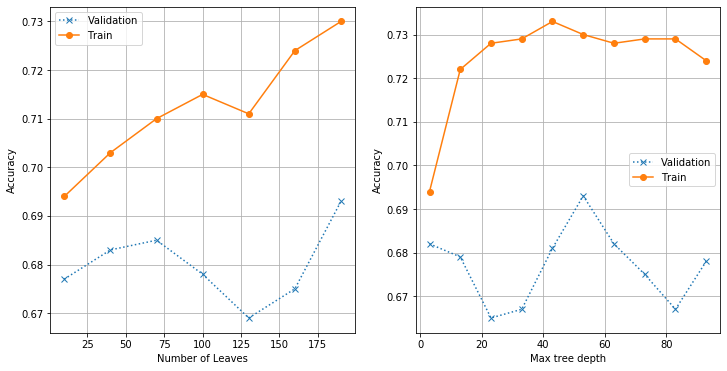

In [13]:
dt = build_decision_tree(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.69, 0.856)
Boostrap: True
N. estimators: 150
Max samples: 0.25
Tree criterion: entropy
Execution took 5.28 min


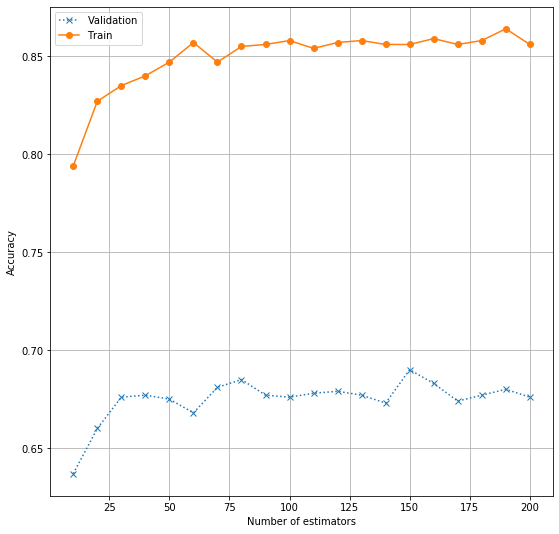

In [24]:
bagged_dt = build_bagging_classifier(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.603, 1.0)
N. estimators: 200
Learning rate: 0.5
Tree criterion: entropy
Execution took 0.13 min


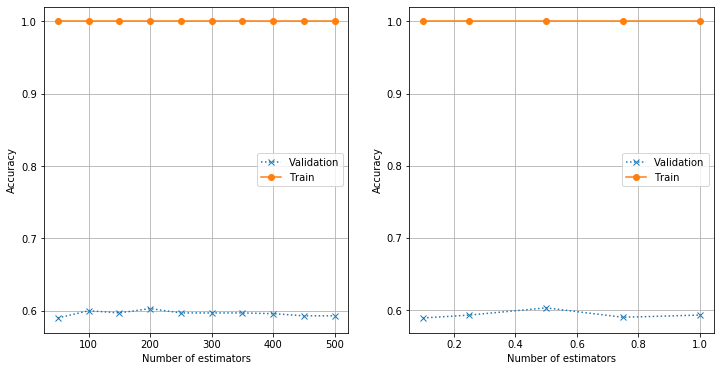

In [25]:
boosted_dt = build_adaboost(X_train, Y_train, X_valid, Y_valid)

Max accuracy (validation, training): (0.674, 1.0)
N. estimators: 50
Criterion: entropy
Bootstrap: True
Features criterion (None means all features): None
Execution took 3.49 min


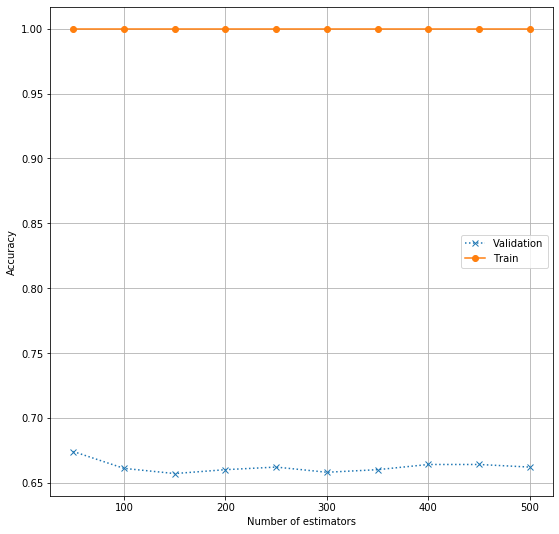

In [26]:
rf = build_random_forest(X_train, Y_train, X_valid, Y_valid)

In [27]:
models = [('Decision tree', dt), 
          ('Bagging', bagged_dt), 
          ('AdaBoost', boosted_dt), 
          ('Random Forest', rf)]

Approximate decision boundaries for the different models


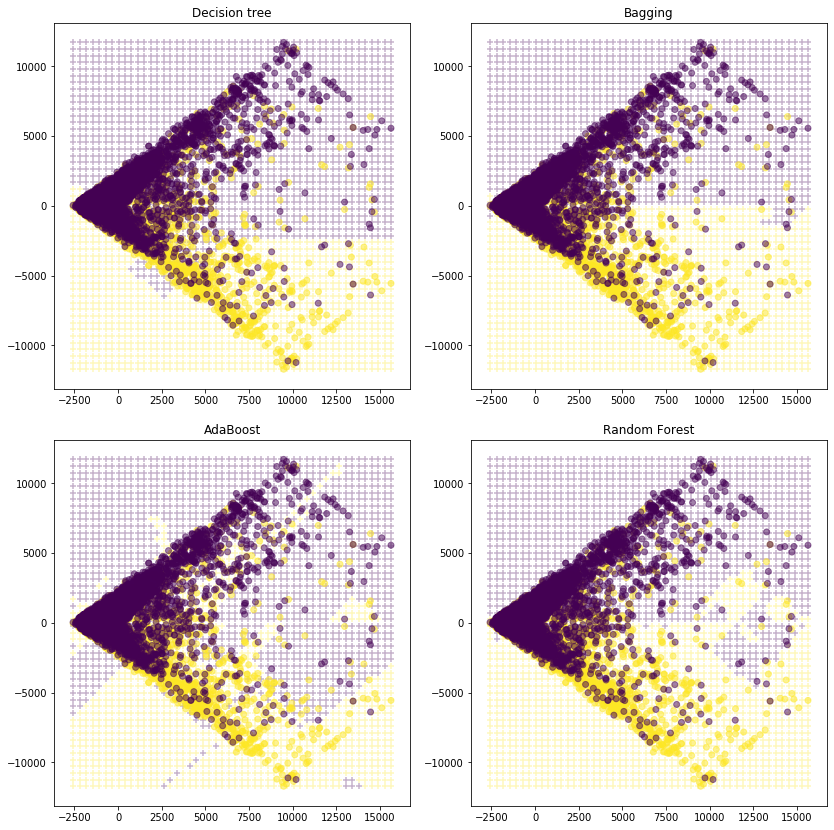

In [28]:
model_decision_boundary(models, X, Y)

 0  ->  Series
 1  ->  Court
 2  ->  Round
 3  ->  Best of
 4  ->  P1Rank
 5  ->  P2Rank
 6  ->  WPts
 7  ->  LPts
 8  ->  WElo
 9  ->  WSurfElo
10  ->  WHand
11  ->  WBHand
12  ->  LElo
13  ->  LSurfElo
14  ->  LHand
15  ->  LBHand
16  ->  Surface__Clay
17  ->  Surface__Grass
18  ->  Surface__Hard
19  ->  GreaterRank


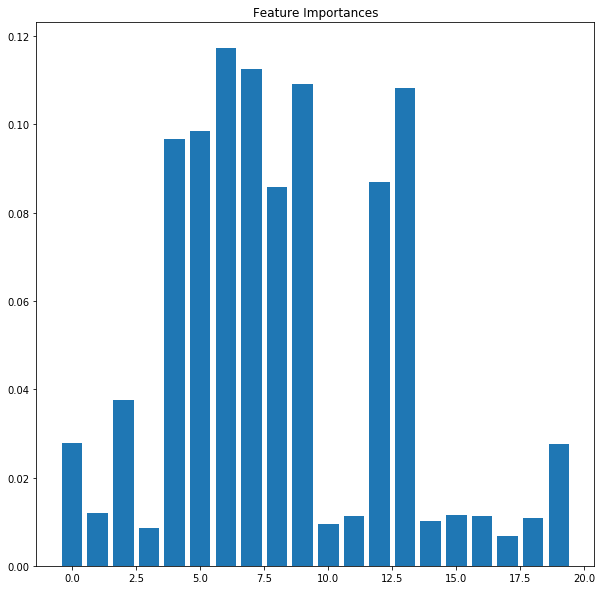

In [29]:
feature_importance(X, rf)

In [30]:
report(X_test, Y_test, models)

Algorithm: Decision tree
              precision    recall  f1-score   support

           0       0.68      0.63      0.66      1323
           1       0.67      0.71      0.69      1381

    accuracy                           0.67      2704
   macro avg       0.67      0.67      0.67      2704
weighted avg       0.67      0.67      0.67      2704


Algorithm: Bagging
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1323
           1       0.70      0.70      0.70      1381

    accuracy                           0.69      2704
   macro avg       0.69      0.69      0.69      2704
weighted avg       0.69      0.69      0.69      2704


Algorithm: AdaBoost
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1323
           1       0.62      0.62      0.62      1381

    accuracy                           0.61      2704
   macro avg       0.61      0.61      0.61      2704
weighted